In [1]:
!pip install tweepy
!pip install pymongo
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime



In [2]:
api_key = "1dSWQ7sR4VzVcx0GmLBZwLN7t" # <---- Add your API Key
api_secret = "ngma3SLArKBPgtTAu5RP88SwBpKPVZhUSwhAsFHP4Dw0c0zu56" # <---- Add your API Secret
access_token = "1089121501897342977-4t0Rv3crUu6kDTOInQKJfeQeX0WCtq" # <---- Add your access token
access_token_secret = "hpr7WwHndEwFhd68XjCsKpMLBkIGraAv5TRmUNU5QKGL3" # <---- Add your access token secret

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
col = pymongo.MongoClient()["americanelection"]["donaldtrump"]
col.count()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  # This is added back by InteractiveShellApp.init_path()


11835

In [3]:
class MyStreamListener(tweepy.StreamListener):
    
    counter = 0
    
    def __init__(self, max_tweets=5000, *args, **kwargs):
        self.max_tweets = max_tweets
        self.counter = 0
        super().__init__(*args, **kwargs)
    
    def on_connect(self):
        self.counter = 0
        self.start_time = datetime.now()
    
    def on_status(self, status):
        # Increment counter
        self.counter += 1
        
        # Store tweet to MongoDB
        col.insert_one(status._json)
        
        
        if self.counter % 1 == 0:
            value = int(100.00 * self.counter / self.max_tweets)
            mining_time = datetime.now() - self.start_time
            progress_bar.value = value
            html_value = """<span class="label label-primary">Tweets/Sec: %.1f</span>""" % (self.counter / max([1,mining_time.seconds]))
            html_value += """ <span class="label label-success">Progress: %.1f%%</span>""" % (self.counter / self.max_tweets * 100.0)
            html_value += """ <span class="label label-info">ETA: %.1f Sec</span>""" % ((self.max_tweets - self.counter) / (self.counter / max([1,mining_time.seconds])))
            wgt_status.value = html_value
            #print("%s/%s" % (self.counter, self.max_tweets))
            if self.counter >= self.max_tweets:
                myStream.disconnect()
                print("Finished")
                print("Total Mining Time: %s" % (mining_time))
                print("Tweets/Sec: %.1f" % (self.max_tweets / mining_time.seconds))
                progress_bar.value = 0
                
    
myStreamListener = MyStreamListener(max_tweets=5000)
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
keywords = ["Donald Trump",
            "Make America Great",
           ]

# Visualize a progress bar to track progress
progress_bar = wgt.IntProgress(value=0)
display(progress_bar)
wgt_status = wgt.HTML(value="""<span class="label label-primary">Tweets/Sec: 0.0</span>""")
display(wgt_status)

# Start a filter with an error counter of 20
for error_counter in range(20):
    try:
        myStream.filter(track=keywords)
        print("Tweets collected: %s" % myStream.listener.counter)
        print("Total tweets in collection: %s" % col.count())
        break
    except:
        print("ERROR# %s" % (error_counter + 1))

IntProgress(value=0)

HTML(value='<span class="label label-primary">Tweets/Sec: 0.0</span>')

Finished
Total Mining Time: 0:05:27.579419
Tweets/Sec: 15.3
Tweets collected: 5000
Total tweets in collection: 16835


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere


In [4]:
col.find_one()

{'_id': ObjectId('5f83c77966901d5f1923370e'),
 'created_at': 'Mon Oct 12 03:03:15 +0000 2020',
 'id': 1315488170432061440,
 'id_str': '1315488170432061440',
 'text': 'RT @davidcicilline: The Taliban, Russia, and China all want Donald Trump to win this election. \n\nWhen three of America’s biggest adversarie…',
 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1270196435124805632,
  'id_str': '1270196435124805632',
  'name': 'Shawna Hanley',
  'screen_name': '2020erase',
  'location': None,
  'url': None,
  'description': 'Vote the psychopath out. #BLM #RBG✊🏼 #vanlife #upperleft',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 134,
  'friends_count': 316,
  'listed_count': 0,
  'favourites_count':

In [5]:

dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset = pd.DataFrame(dataset)
dataset

,created_at,text,user,source,lang
0,Mon Oct 12 03:03:15 +0000 2020,"RT @davidcicilline: The Taliban, Russia, and C...",@2020erase,"<a href=""http://twitter.com/#!/download/ipad"" ...",en
1,Mon Oct 12 03:03:15 +0000 2020,RT @HelenKennedy: Joe Biden’s most recent endo...,@alec_duncan,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
2,Mon Oct 12 03:03:15 +0000 2020,RT @acnewsitics: Hunter Biden was Chairman of ...,@GoshSamIt,"<a href=""http://twitter.com/download/iphone"" r...",en
3,Mon Oct 12 03:03:15 +0000 2020,RT @LynMcKenzie10: I stand with @MeidasTouch t...,@supergril62,"<a href=""http://twitter.com/download/iphone"" r...",en
4,Mon Oct 12 03:03:15 +0000 2020,@realDonaldTrump Hunter Biden was Chairman of ...,@Boomsha41924076,"<a href=""http://twitter.com/download/android"" ...",en
...,...,...,...,...,...
16830,Wed Oct 14 02:59:17 +0000 2020,RT @deangloster: Fun fact: anyone in military ...,@PINK1963DSW,"<a href=""http://twitter.com/download/iphone"" r...",en
16831,Wed Oct 14 02:59:18 +0000 2020,RT @lonestarmoocher: To My UNION BROTHERS IN P...,@Bobby1227,"<a href=""http://twitter.com/download/android"" ...",en
16832,Wed Oct 14 02:59:18 +0000 2020,"RT @ewarren: If this feels personal, that’s be...",@dmill1010,"<a href=""http://twitter.com/download/iphone"" r...",en
16833,Wed Oct 14 02:59:18 +0000 2020,I don’t think Putin will be happy if he wins R...,@feloneouscat,"<a href=""http://twitter.com/download/iphone"" r...",en


In [6]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,14973
1,trump,13320
2,the,10980
3,donald,10657
4,of,7607
5,in,5306
6,to,5211
7,is,3954
8,you,3785
9,https,3694


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


IFTTT                         7
Twitterrific for iOS          9
WordPress.com                14
Cheap Bots, Done Quick!      15
Tweetbot for iΟS             27
TweetDeck                    86
Twitter for iPad           1357
Twitter Web App            3178
Twitter for Android        4478
Twitter for iPhone         7573
Name: source, dtype: int64

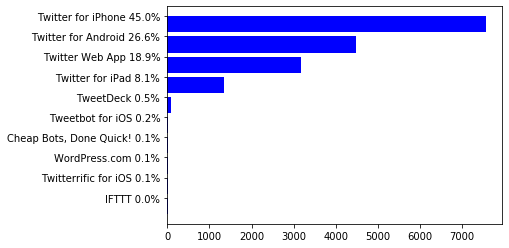

In [7]:

def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
dataset.source_name = dataset.source.apply(get_source_name)

source_counts = dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

ca        12
de        16
in        20
ja        25
zh        28
fr        44
pt        54
es       363
und      512
en     15726
Name: lang, dtype: int64

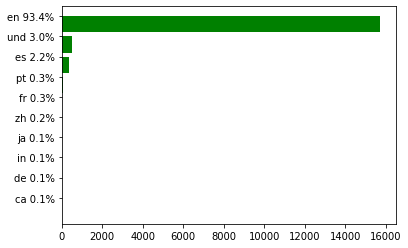

In [8]:
lang_counts = dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [9]:

from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [10]:
dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset1 = pd.DataFrame(dataset1)
is_dataset1=dataset1.lang=="en"
dataset1=dataset1[is_dataset1]
dataset1

,id,text,lang
0,1315488170432061440,"RT @davidcicilline: The Taliban, Russia, and C...",en
1,1315488170948124672,RT @HelenKennedy: Joe Biden’s most recent endo...,en
2,1315488171250065409,RT @acnewsitics: Hunter Biden was Chairman of ...,en
3,1315488172219006978,RT @LynMcKenzie10: I stand with @MeidasTouch t...,en
4,1315488172567138304,@realDonaldTrump Hunter Biden was Chairman of ...,en
...,...,...,...
16830,1316211951714938880,RT @deangloster: Fun fact: anyone in military ...,en
16831,1316211952012664833,RT @lonestarmoocher: To My UNION BROTHERS IN P...,en
16832,1316211952276910085,"RT @ewarren: If this feels personal, that’s be...",en
16833,1316211952205680641,I don’t think Putin will be happy if he wins R...,en


In [11]:
!pip install textblob
from  textblob import TextBlob


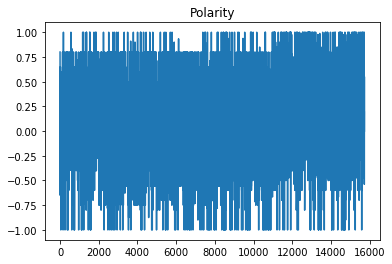

In [12]:
tweettext=dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

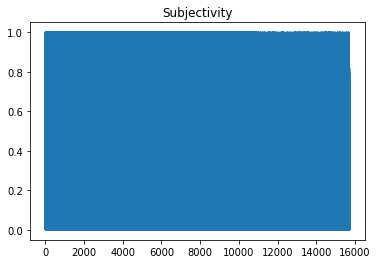

In [13]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [14]:
import statistics
statistics.mean(poltweet.polarity)

0.05510047994801517

In [15]:
import statistics
statistics.mean(poltweet.subjectivity)

0.35875649780798896